In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_excel('Prepared_Data.xlsx')

# Feature Selection

In [3]:
y = data['Price']

In [4]:
X = data.drop(['Price','Unnamed: 0'], axis=1)

In [5]:
from sklearn.feature_selection import mutual_info_regression

In [6]:
imp = mutual_info_regression(X , y)

In [7]:
imp

array([0.9792047 , 1.00157352, 0.77532167, 0.2200576 , 0.62171061,
       0.3425035 , 0.26306481, 0.39582507, 0.35516098, 0.46095293,
       0.34881433, 0.38083907, 0.45757273, 0.51658393, 0.1317935 ,
       0.20084699])

In [8]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [9]:
imp_df.columns = ['importance']

In [10]:
imp_df

,importance
Airline,0.979205
Destination,1.001574
Total_Stops,0.775322
journey_day,0.220058
journey_month,0.621711
Dep_Time_hour,0.342503
Dep_Time_minute,0.263065
Arrival_Time_hour,0.395825
Arrival_Time_minute,0.355161
Duration_hours,0.460953


In [11]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Destination,1.001574
Airline,0.979205
Total_Stops,0.775322
journey_month,0.621711
Source_Delhi,0.516584
Duration_hours,0.460953
Source_Kolkata,0.457573
Arrival_Time_hour,0.395825
Source_Banglore,0.380839
Arrival_Time_minute,0.355161


# Building Model

In [32]:
column_seq=list(X.columns)
import pickle
with open('col_seq','wb') as file:
    pickle.dump(column_seq,file)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

# RFR

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
ml_model = RandomForestRegressor()

In [16]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [17]:
y_pred = ml_model.predict(X_test)

In [18]:
from sklearn import metrics

In [19]:
metrics.r2_score(y_test , y_pred)

0.8074172058926021

In [20]:
import pickle

In [21]:
with open('rf_random.pkl','wb') as file:
    pickle.dump(ml_model , file)

# Creating a pipline

In [22]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [23]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9516247781915615
predictions are : [16903.56        5484.54        8802.25       ...  3496.35
  6299.35333333  6791.65      ]


r2 score : 0.8098820555205228
MAE : 1182.7160657000557
MSE : 3701140.0323409364
RMSE : 1923.8347206402468
MAPE : 13.216991056225716


/tmp/ipykernel_7620/2529260170.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


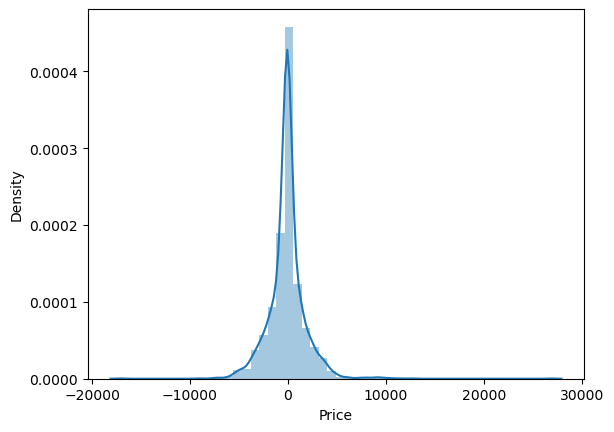

In [24]:
predict(RandomForestRegressor())

# Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

/tmp/ipykernel_7620/2529260170.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_predection)


Training score : 0.966591628243878
predictions are : [16840.  4959.  8610. ...  3419.  5797.  6442.]


r2 score : 0.6799751884273797
MAE : 1407.052227630101
MSE : 6230114.914700487
RMSE : 2496.019814564878
MAPE : 15.574748162044413


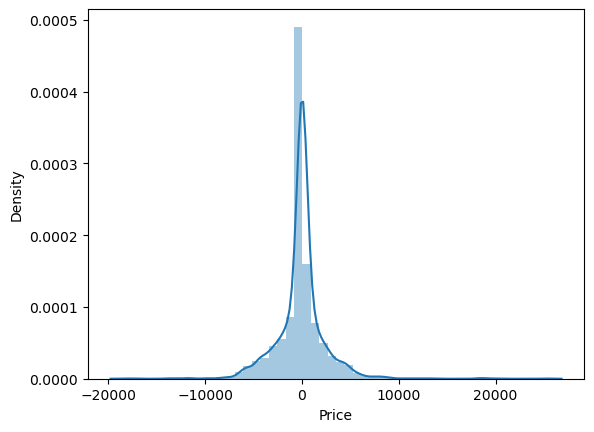

In [26]:
predict(DecisionTreeRegressor())

In [27]:
testdf=pd.read_excel('Test_set.xlsx')

In [28]:
testdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Create a complete pipeline which will take data as a data frame and preprocess it and do all the tasks directly